In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import datetime as dt
from scipy.stats import linregress

electricity_data_to_load = "Resources/complete_dataset.csv"
electricity_data = pd.read_csv(electricity_data_to_load)
electricity_data.head(2)


,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.03,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.01,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N


In [97]:
#Renaming columns
electricity_data_df = electricity_data.rename(columns={"date":"Date", "demand":"Demand (MWh)", "RRP": "RRP (AUD/MWh)",
                                                       "min_temperature":"Min Temperature", "max_temperature":"Max temperature",
                                                       "solar_exposure":"Total Sunlight Energy (MJ/m^2)", "rainfall": "Rainfall (mm)",
                                                      "school_day":"School Day", "holiday":"Holiday"})
electricity_data_df.head(3)

,Date,Demand (MWh),RRP (AUD/MWh),demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,Min Temperature,Max temperature,Total Sunlight Energy (MJ/m^2),Rainfall (mm),School Day,Holiday
0,2015-01-01,99635.03,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.01,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.54,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N


In [98]:
#Reducing data frame to only relevant columns by index
electricity_data_clean = electricity_data_df.drop(electricity_data_df.columns[[3,4,5,6,7]],axis=1)

In [99]:
#Dropping rows with missing values
electricity_data_clean = electricity_data_clean.dropna()

In [100]:
electricity_data.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [101]:
#Removing rows with large price outliers
electricity_data_clean.sort_values("RRP (AUD/MWh)").tail(20)
electricity_data_clean = electricity_data_clean.loc[electricity_data_clean["RRP (AUD/MWh)"] <= 200, :]
electricity_data_clean.head()

,Date,Demand (MWh),RRP (AUD/MWh),Min Temperature,Max temperature,Total Sunlight Energy (MJ/m^2),Rainfall (mm),School Day,Holiday
0,2015-01-01,99635.030,25.633696,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,15.0,22.0,30.7,0.0,N,N


The P-value is: 2.0413552877954313e-30
The r-squared is: 0.06
The correlation coefficient is : 0.247


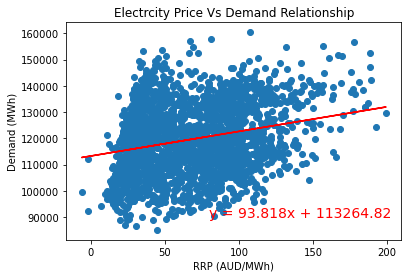

In [102]:
#Getting demand and price data to create scatterplot and check for correlation.
demand = electricity_data_clean["Demand (MWh)"]
price = electricity_data_clean["RRP (AUD/MWh)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(price, demand)
regress_values = price * slope + intercept
line_eq = (f'y = {round(slope,3)}x + {round(intercept,2)}')
plt.scatter(price, demand)
plt.plot(price, regress_values,"red")
plt.annotate(line_eq,(80,90000), color="red",fontsize=14)
plt.title("Electrcity Price Vs Demand Relationship")
plt.xlabel("RRP (AUD/MWh)")
plt.ylabel("Demand (MWh)")
print(f"The P-value is: {(pvalue)}")
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f'The correlation coefficient is : {round(rvalue,3)}')


The P-value is: 3.030363958530687e-43
The r-squared is: 0.09
The correlation coefficient is : -0.295


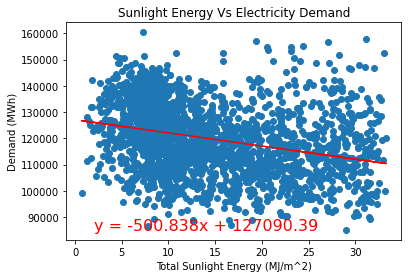

In [103]:
#Linear regression to test relationship between sunlight energy and demand
sunlight= electricity_data_clean["Total Sunlight Energy (MJ/m^2)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sunlight, demand)
regress_values = sunlight * slope + intercept
line_eq = (f'y = {round(slope,3)}x + {round(intercept,2)}')
plt.scatter(sunlight, demand)
plt.plot(sunlight, regress_values,"red")
plt.annotate(line_eq,(2,85000), color="red",fontsize=16)
plt.title("Sunlight Energy Vs Electricity Demand")
plt.xlabel("Total Sunlight Energy (MJ/m^2)")
plt.ylabel("Demand (MWh)")
print(f"The P-value is: {(pvalue)}")
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f'The correlation coefficient is : {round(rvalue,3)}')

In [104]:
#Creating 2 bins based on solar energy levels
solar_bins = pd.cut(electricity_data_clean["Total Sunlight Energy (MJ/m^2)"], bins=2, 
                                        labels=("Low Sunlight", "High Sunlight"))
solar_bins

0       High Sunlight
1       High Sunlight
2       High Sunlight
3       High Sunlight
4       High Sunlight
            ...      
2101    High Sunlight
2102    High Sunlight
2103     Low Sunlight
2104     Low Sunlight
2105     Low Sunlight
Name: Total Sunlight Energy (MJ/m^2), Length: 2084, dtype: category
Categories (2, object): [Low Sunlight < High Sunlight]

In [105]:
electricity_data_clean["Sunlight Level"] = solar_bins

In [106]:
#Creating variable for low and high sunlight energy
low_sunlight = electricity_data_clean.loc[electricity_data_clean["Sunlight Level"] == "Low Sunlight",:]
high_sunlight = electricity_data_clean.loc[electricity_data_clean["Sunlight Level"] == "High Sunlight",:]

In [107]:
#Converting data type to datetime
electricity_data_clean["Date"] = pd.to_datetime(electricity_data_clean['Date'])

In [108]:
#creating data frames for 2015 and 2020
data_2015 = electricity_data_clean[electricity_data_clean['Date'].dt.year == 2015]
data_2020 = electricity_data_clean[electricity_data_clean['Date'].dt.year == 2020]

In [109]:
#Grouping by sunlight level to find demand at both years
data_2020_demand = data_2020.groupby("Sunlight Level")["Demand (MWh)"].mean()
data_2015_demand = data_2015.groupby("Sunlight Level")["Demand (MWh)"].mean()

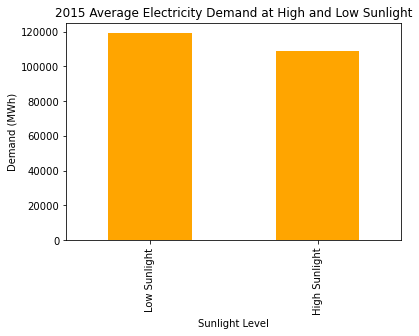

Average demand (MWh) on low sunlight days: 127926.0
Average demand (MWh) on high sunlight days: 119880.0
6.71 % increase when moving from high sunlight to low sunlight.


In [110]:
#Creating bar plots for low and high sunlight energy in 2015 and 2020
sunlight_2015_plot = data_2020_demand.plot.bar(color = "orange")
plt.title("2015 Average Electricity Demand at High and Low Sunlight")
plt.xlabel("Sunlight Level")
plt.ylabel("Demand (MWh)")
plt.show()
print(f'Average demand (MWh) on low sunlight days: {round(data_2015_demand["Low Sunlight"])}')
print(f'Average demand (MWh) on high sunlight days: {round(data_2015_demand["High Sunlight"])}')
percent_change_2015 = (data_2015_demand["Low Sunlight"] - data_2015_demand["High Sunlight"]) / data_2015_demand["High Sunlight"]
print(f'{round(percent_change_2015*100,2)} % increase when moving from high sunlight to low sunlight.')

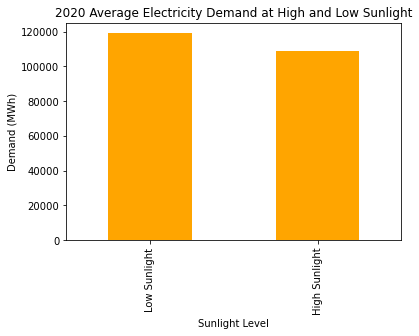

Average demand (MWh) on low sunlight days: 119135.0
Average demand (MWh) on high sunlight days: 109105.0
9.19 % increase in electricity demand when moving from high sunlight to low sunlight.


In [111]:
sunlight_2020_plot = data_2020_demand.plot.bar(color="orange")
plt.title("2020 Average Electricity Demand at High and Low Sunlight")
plt.xlabel("Sunlight Level")
plt.ylabel("Demand (MWh)")
plt.show()
print(f'Average demand (MWh) on low sunlight days: {round(data_2020_demand["Low Sunlight"])}')
print(f'Average demand (MWh) on high sunlight days: {round(data_2020_demand["High Sunlight"])}')
percent_change_2020 = (data_2020_demand["Low Sunlight"] - data_2020_demand["High Sunlight"]) / data_2020_demand["High Sunlight"]
print(f'{round(percent_change_2020*100,2)} % increase in electricity demand when moving from high sunlight to low sunlight.')

In [112]:
#Creating reduced data frame to contain only date, demand and max temperature
max_temp_demand_df = electricity_data_clean[["Date", "Demand (MWh)", "Max temperature"]]
max_temp_demand_df.head()

,Date,Demand (MWh),Max temperature
0,2015-01-01,99635.030,26.9
1,2015-01-02,129606.010,38.8
2,2015-01-03,142300.540,38.2
3,2015-01-04,104330.715,21.4
4,2015-01-05,118132.200,22.0


In [113]:
#Creating data frame with max temperatures below 24 C
df1 = max_temp_demand_df.loc[max_temp_demand_df["Max temperature"] <= 24, [
    "Date", "Demand (MWh)", "Max temperature"]]
df1

,Date,Demand (MWh),Max temperature
3,2015-01-04,104330.715,21.4
4,2015-01-05,118132.200,22.0
8,2015-01-09,121801.155,18.0
9,2015-01-10,103043.660,21.7
13,2015-01-14,119741.620,22.7
...,...,...,...
2098,2020-09-29,112076.460,21.0
2099,2020-09-30,113620.210,19.4
2100,2020-10-01,106641.790,19.5
2104,2020-10-05,113610.030,12.7


In [114]:
#Creating data frame with max temperatures above 24 C
df2 = max_temp_demand_df.loc[max_temp_demand_df["Max temperature"] > 24, [
    "Date", "Demand (MWh)", "Max temperature"]]
df2

,Date,Demand (MWh),Max temperature
0,2015-01-01,99635.030,26.9
1,2015-01-02,129606.010,38.8
2,2015-01-03,142300.540,38.2
5,2015-01-06,130672.485,26.0
6,2015-01-07,153514.820,37.4
...,...,...,...
1914,2020-03-29,95953.205,26.4
2088,2020-09-19,93384.000,26.3
2101,2020-10-02,99585.835,26.0
2102,2020-10-03,92277.025,29.4


The p-value is: 4.244198780592911e-147
The r-value is: -0.5869380724412395
The r-squared is: 0.3444963008810377


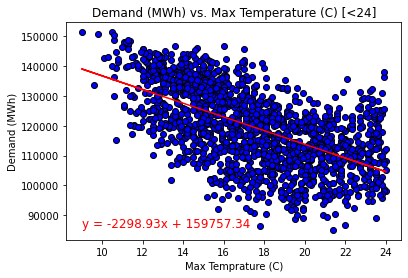

In [115]:
# Plot 1: Max Temperature (<24 C) vs. Demand
x_values = df1 ["Max temperature"]
y_values = df1 ["Demand (MWh)"]

plt.scatter(x_values,y_values, marker = "o", facecolor = "blue", edgecolor="black")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (9, 86000), fontsize=12,color="red")
plt.xlabel("Max Temprature (C)")
plt.ylabel("Demand (MWh)")
plt.title("Demand (MWh) vs. Max Temperature (C) [<24]")
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The p-value is: 1.565001841524721e-35
The r-value is: 0.5161879207983964
The r-squared is: 0.2664499695781715


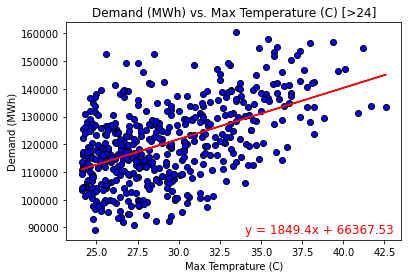

In [116]:
# Plot 2: Max Temperature (>24) vs. Demand
x_values = df2 ["Max temperature"]
y_values = df2 ["Demand (MWh)"]

plt.scatter(x_values,y_values, marker = "o", facecolor = "blue", edgecolor="black")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (34, 88000), fontsize=12,color="red")
plt.xlabel("Max Temprature (C)")
plt.ylabel("Demand (MWh)")
plt.title("Demand (MWh) vs. Max Temperature (C) [>24]")
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [117]:
#Creating data frame with date, demand and if the day is a school day or not
schooldays_demand_df = electricity_data_clean[["Date", "Demand (MWh)", "School Day"]]
schooldays_demand_df.head()

,Date,Demand (MWh),School Day
0,2015-01-01,99635.030,N
1,2015-01-02,129606.010,N
2,2015-01-03,142300.540,N
3,2015-01-04,104330.715,N
4,2015-01-05,118132.200,N


In [118]:
#Creating data frames for only school days
df3 = schooldays_demand_df.loc[schooldays_demand_df["School Day"] == "Y", :]
df3

,Date,Demand (MWh),School Day
28,2015-01-29,119313.730,Y
29,2015-01-30,121018.150,Y
30,2015-01-31,103822.970,Y
31,2015-02-01,100178.840,Y
32,2015-02-02,118694.160,Y
...,...,...,...
2037,2020-07-30,132583.640,Y
2038,2020-07-31,132105.750,Y
2039,2020-08-01,111590.650,Y
2040,2020-08-02,109935.335,Y


In [119]:
mean_dy = df3["Demand (MWh)"].mean()
mean_dy

121003.9992331714

In [120]:
#Creating data frames for only non-school days
df4 = schooldays_demand_df.loc[schooldays_demand_df["School Day"] == "N", :]
df4

,Date,Demand (MWh),School Day
0,2015-01-01,99635.030,N
1,2015-01-02,129606.010,N
2,2015-01-03,142300.540,N
3,2015-01-04,104330.715,N
4,2015-01-05,118132.200,N
...,...,...,...
2101,2020-10-02,99585.835,N
2102,2020-10-03,92277.025,N
2103,2020-10-04,94081.565,N
2104,2020-10-05,113610.030,N


In [121]:
mean_dn = df4["Demand (MWh)"].mean()
mean_dn

116931.80112752721

In [122]:
#Setting variables for creating a pie chart
school_day = ["School Day: 121174 (MWh)", "No School Day: 117513 (MWh)"]
mean = [mean_dy, mean_dn]
colours = ["orange","green"]
title = "Average demand comparison School Day vs. No School Day"

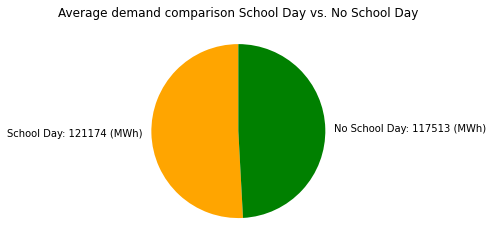

In [123]:
plt.pie(mean, labels=school_day, colors=colours, startangle=90)
plt.title(title)
plt.show()

In [124]:
#Creating unique data frame for each year 2015, 2016, 2017, 2018, 2019, 2020
fifteen = electricity_data_clean[electricity_data_clean['Date'].dt.year == 2015]
sixteen = electricity_data_clean[electricity_data_clean['Date'].dt.year == 2016]
seventeen = electricity_data_clean[electricity_data_clean['Date'].dt.year == 2017]
eighteen = electricity_data_clean[electricity_data_clean['Date'].dt.year == 2018]
nineteen = electricity_data_clean[electricity_data_clean['Date'].dt.year == 2019]
twenty = electricity_data_clean[electricity_data_clean['Date'].dt.year == 2020]


In [125]:
#Creating x and y varibles for each year and then creating a times series plot for each year
x15 = fifteen ["Date"]
y15 = fifteen ["Demand (MWh)"]
x16 = sixteen ["Date"]
y16 = sixteen ["Demand (MWh)"]
x17 = seventeen ["Date"]
y17 = seventeen ["Demand (MWh)"]
x18 = eighteen ["Date"]
y18 = eighteen ["Demand (MWh)"]
x19 = nineteen ["Date"]
y19 = nineteen ["Demand (MWh)"]
x20 = twenty ["Date"]
y20 = twenty ["Demand (MWh)"]

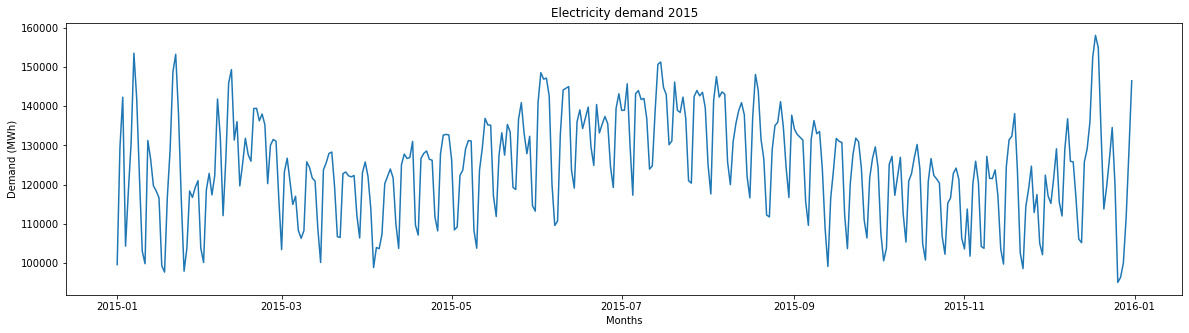

In [126]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
plt.title("Electricity demand 2015")
plt.xlabel("Months")
plt.ylabel("Demand (MWh)")
ax.plot(x15, y15)
plt.show()

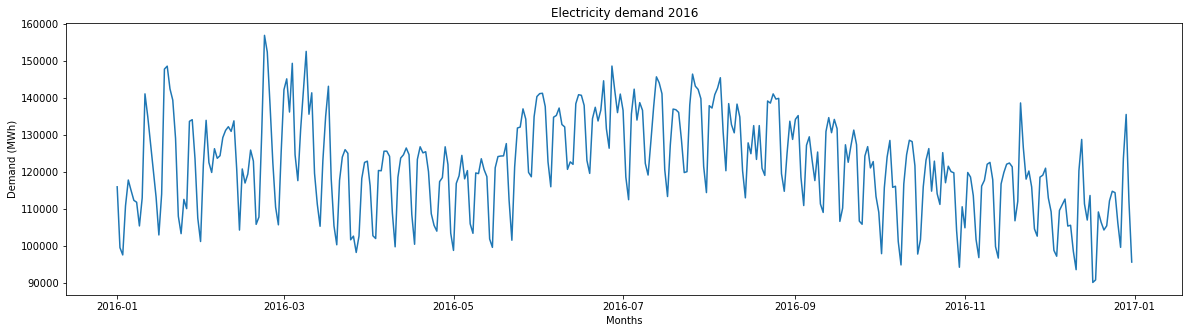

In [127]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
plt.title("Electricity demand 2016")
plt.xlabel("Months")
plt.ylabel("Demand (MWh)")
ax.plot(x16, y16)
plt.show()

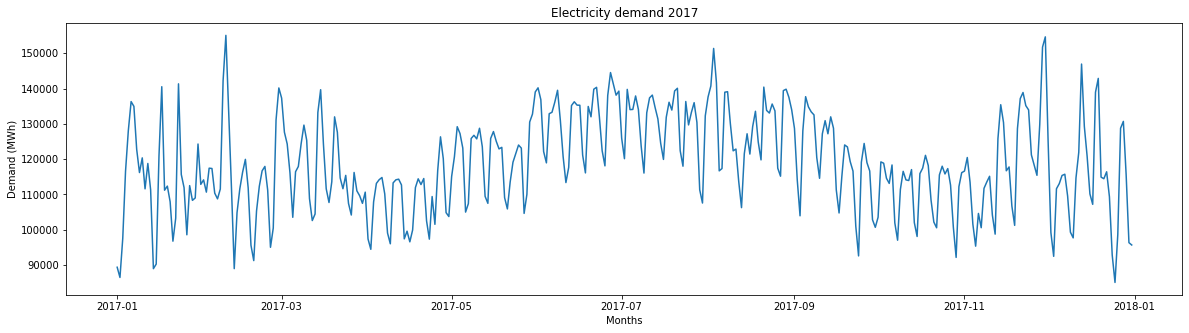

In [128]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
plt.title("Electricity demand 2017")
plt.xlabel("Months")
plt.ylabel("Demand (MWh)")
ax.plot(x17, y17)
plt.show()

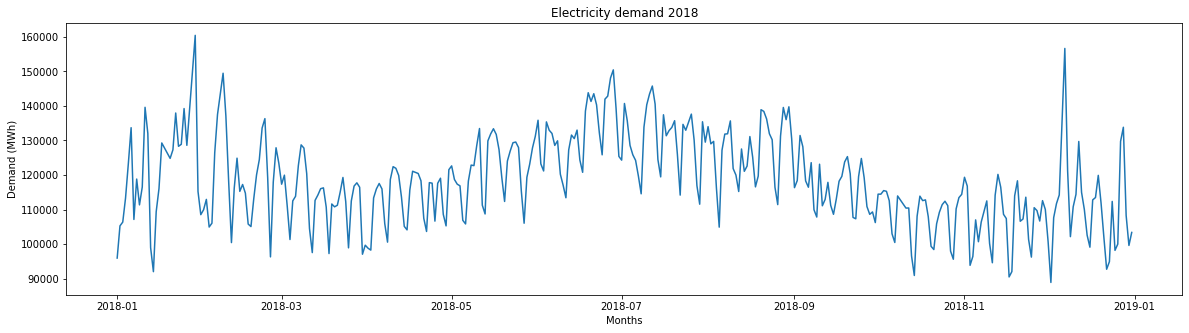

In [129]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
plt.title("Electricity demand 2018")
plt.xlabel("Months")
plt.ylabel("Demand (MWh)")
ax.plot(x18, y18)
plt.show()

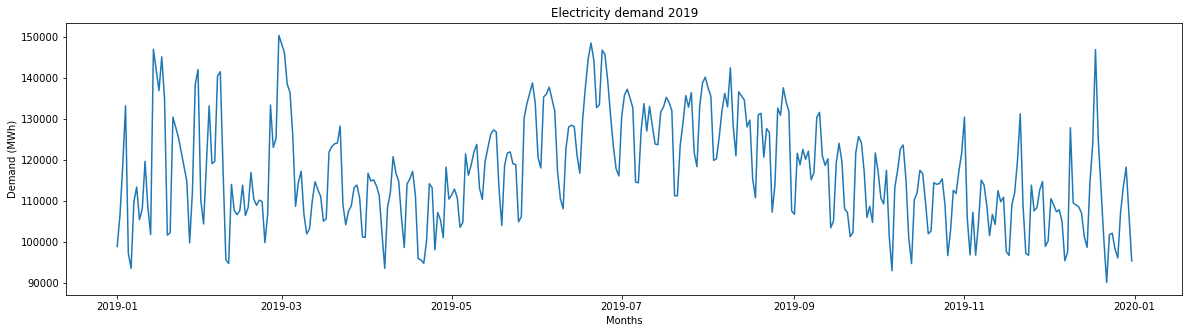

In [130]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
plt.title("Electricity demand 2019")
plt.xlabel("Months")
plt.ylabel("Demand (MWh)")
ax.plot(x19, y19)
plt.show()

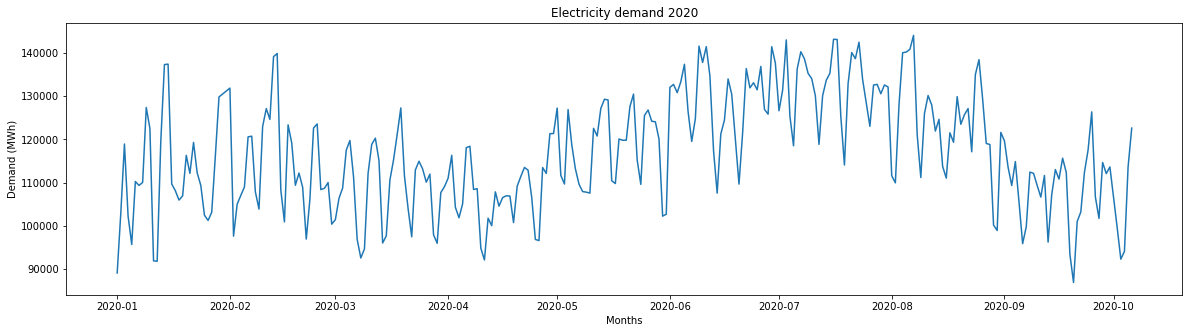

In [131]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
plt.title("Electricity demand 2020")
plt.xlabel("Months")
plt.ylabel("Demand (MWh)")
ax.plot(x20, y20)
plt.show()

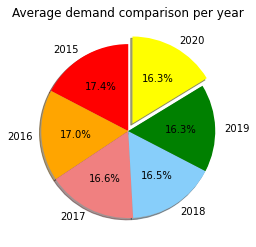

In [132]:
#Pie chart of average demand for each year
demand15 = fifteen ["Demand (MWh)"].mean()
demand16 = sixteen ["Demand (MWh)"].mean()
demand17 = seventeen ["Demand (MWh)"].mean()
demand18 = eighteen ["Demand (MWh)"].mean()
demand19 = nineteen ["Demand (MWh)"].mean()
demand20 = twenty ["Demand (MWh)"].mean()
labels = ["2015", "2016", "2017", "2018","2019", "2020"]
demand = [demand15, demand16, demand17, demand18, demand19, demand20]
colours = ["red", "orange", "lightcoral", "lightskyblue", "green", "yellow"]
explode = (0, 0, 0, 0, 0, 0.1)
title = "Average demand comparison per year"
plt.pie(demand, explode=explode, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title(title)
plt.show()

In [133]:
electricity_data_clean["Month"] = electricity_data_clean['Date'].dt.month
electricity_data_clean.head()

,Date,Demand (MWh),RRP (AUD/MWh),Min Temperature,Max temperature,Total Sunlight Energy (MJ/m^2),Rainfall (mm),School Day,Holiday,Sunlight Level,Month
0,2015-01-01,99635.030,25.633696,13.3,26.9,23.6,0.0,N,Y,High Sunlight,1
1,2015-01-02,129606.010,33.138988,15.4,38.8,26.8,0.0,N,N,High Sunlight,1
2,2015-01-03,142300.540,34.564855,20.0,38.2,26.5,0.0,N,N,High Sunlight,1
3,2015-01-04,104330.715,25.005560,16.3,21.4,25.2,4.2,N,N,High Sunlight,1
4,2015-01-05,118132.200,26.724176,15.0,22.0,30.7,0.0,N,N,High Sunlight,1


In [134]:
#Grouping by month to find average max temperature and demand for each month of the year
max_temp_average_by_month = electricity_data_clean.groupby("Month")["Max temperature"].mean()
max_temp_average_by_month

Month
1     26.140909
2     25.646108
3     24.357609
4     20.951667
5     17.466667
6     14.695531
7     14.375269
8     14.883243
9     17.467778
10    21.450314
11    22.603356
12    25.428105
Name: Max temperature, dtype: float64

In [135]:
demand_average_by_month = electricity_data_clean.groupby("Month")["Demand (MWh)"].mean()
demand_average_by_month

Month
1     116866.992159
2     119471.587066
3     115723.221223
4     112245.103556
5     120767.550995
6     131707.883911
7     131799.381022
8     128489.991216
9     117784.891083
10    112218.851572
11    113270.822819
12    113013.952092
Name: Demand (MWh), dtype: float64

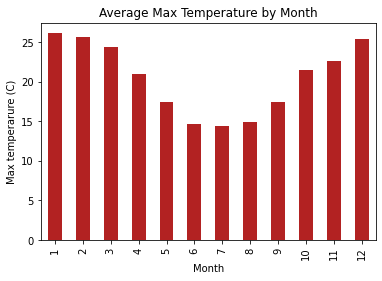

In [138]:
#Plotting the monthly temperature and demand
max_temp_plot = max_temp_average_by_month.plot.bar(color="firebrick")
plt.title("Average Max Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Max temperarure (C)")
plt.show()

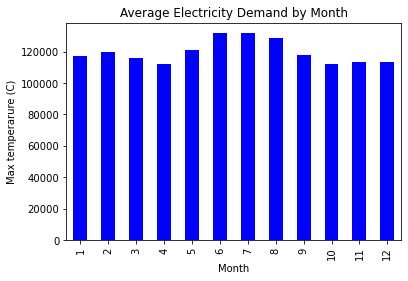

In [139]:
demand_average_plot = demand_average_by_month.plot.bar(color="Blue")
plt.title("Average Electricity Demand by Month")
plt.xlabel("Month")
plt.ylabel("Max temperarure (C)")
plt.show()